### Problem 3: Stochastic Gradient Descent (30 points)

In class we covered the baseline stochastic gradient descent.  Using the linear regression example from the class notes, develop from scratch the baseline SGD algorithm. :

Clearly state the hyperparameters you used and present the loss vs epoch plot that demonstrates the convergence of the algorithm.

In [2]:
!pip install git+https://github.com/pantelis-classes/PRML.git#egg=prml

import seaborn as sns

# Apply the default theme
sns.set_theme()

  Cloning https://github.com/pantelis-classes/PRML.git to /tmp/pip-install-38u7haym/prml_c0800f82d08049b9b2ff17fe975b74db
  Running command git clone --filter=blob:none --quiet https://github.com/pantelis-classes/PRML.git /tmp/pip-install-38u7haym/prml_c0800f82d08049b9b2ff17fe975b74db
  Resolved https://github.com/pantelis-classes/PRML.git to commit 14cf88538d2704fd18b391ae6309fb38c65a6412
  Preparing metadata (setup.py) ... done
  Created wheel for prml: filename=prml-0.0.1-py3-none-any.whl size=88384 sha256=f25ab54f64869b245531a21ee6dc6bd751edd50b85efaaf5bb87b9000e555b87
  Stored in directory: /tmp/pip-ephem-wheel-cache-dhnhxugh/wheels/be/c7/69/639b72a88940bc45c2c531c36b623139c05036dab44d33b761
Successfully built prml


In [7]:
# Insert your answer here and fee free to add markdown cells as needed
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
%matplotlib inline

from prml.preprocess import GaussianFeature, PolynomialFeature, SigmoidalFeature
from prml.linear import (
    BayesianRegression,
    EmpiricalBayesRegression,
    LinearRegression,
    RidgeRegression
)

np.random.seed(1234)

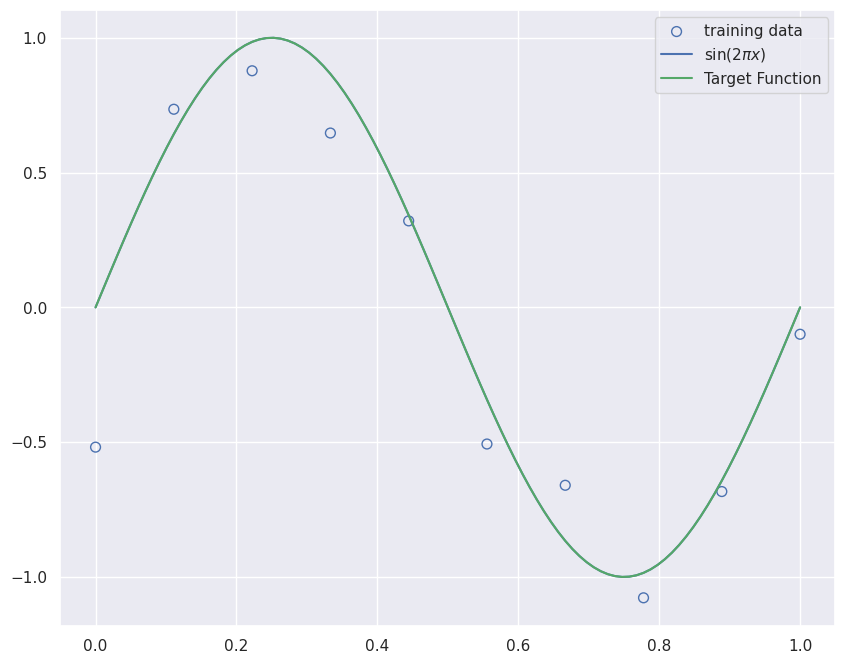

In [8]:
def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    y = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, y

def sinusoidal(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(sinusoidal, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = sinusoidal(x_test)

plt.figure(figsize=[10,8])
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, label="$\sin(2\pi x)$")
plt.plot(x_test, y_test, "-g", label="Target Function")
plt.legend()
plt.show()

Text(0.5, 0.01, 'Polynomial, Gaussian and Sigmoidal basis functions')

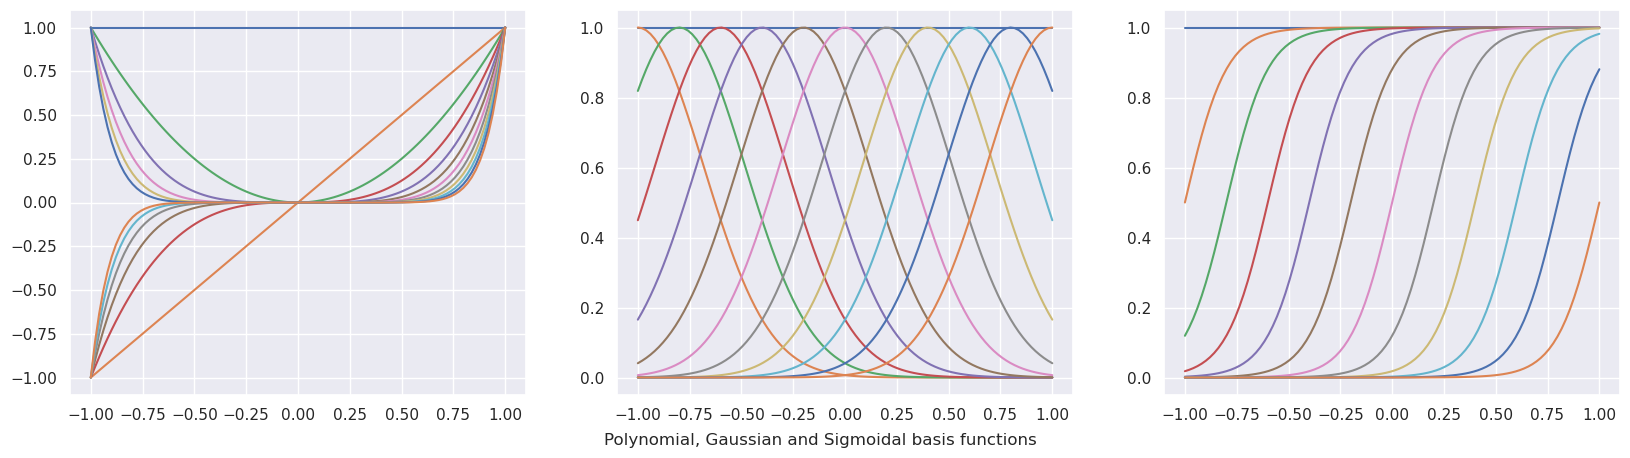

In [9]:
x = np.linspace(-1, 1, 100)
X_polynomial = PolynomialFeature(11).transform(x[:, None])
X_gaussian = GaussianFeature(np.linspace(-1, 1, 11), 0.1).transform(x)
X_sigmoidal = SigmoidalFeature(np.linspace(-1, 1, 11), 10).transform(x)

plt.figure(figsize=(20, 5))
for i, X in enumerate([X_polynomial, X_gaussian, X_sigmoidal]):
    plt.subplot(1, 3, i + 1)
    for j in range(12):
        plt.plot(x, X[:, j])
txt="Polynomial, Gaussian and Sigmoidal basis functions"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)

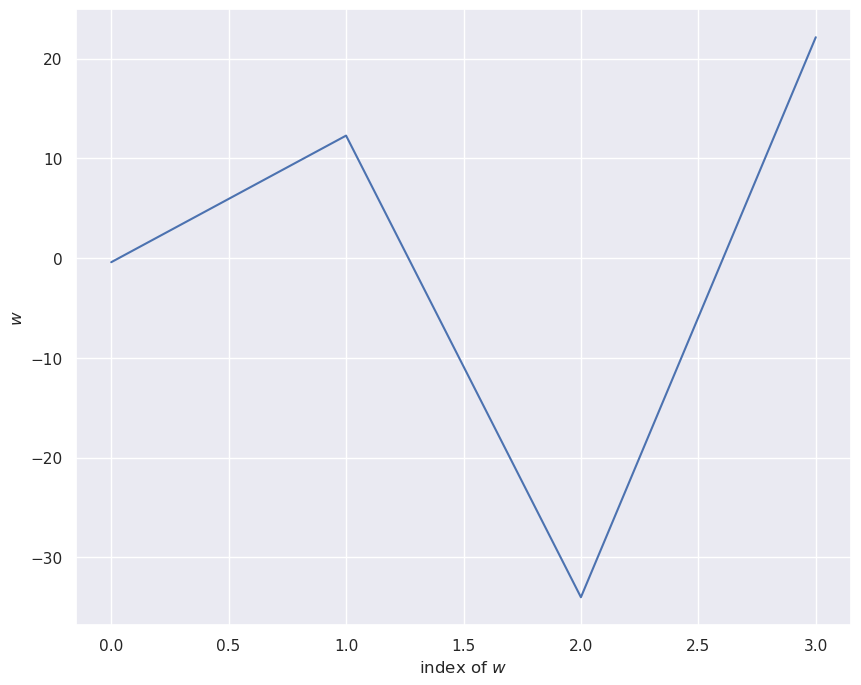

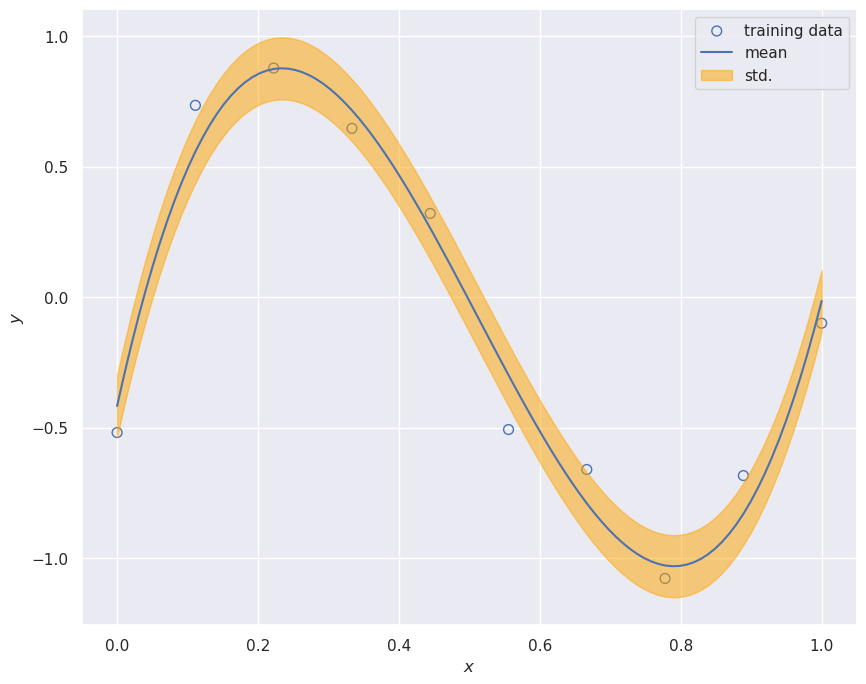

In [11]:
M=3
# Pick one of the three features below
feature = PolynomialFeature(M)
#feature = GaussianFeature(np.linspace(0, 1, M), 0.1)
# feature = SigmoidalFeature(np.linspace(0, 1, M), 10)

X_train = feature.transform(x_train)
X_test = feature.transform(x_test)
model = LinearRegression()
model.fit(X_train, y_train)

plt.figure(figsize=[10,8])
plt.plot(model.w) 
plt.xlabel("index of $w$")
plt.ylabel("$w$")

y, y_std = model.predict(X_test, return_std=True)

plt.figure(figsize=[10,8])

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y, label="mean")
plt.fill_between(
    x_test, y - y_std, y + y_std,
    color="orange", alpha=0.5, label="std.")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$y$")

plt.show()

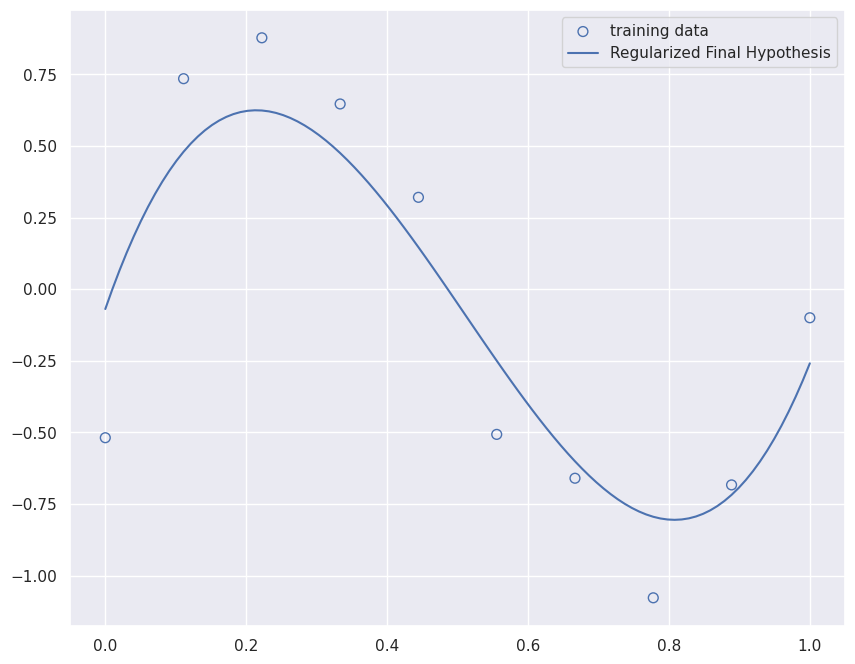

In [12]:
model = RidgeRegression(alpha=1e-3)
model.fit(X_train, y_train)
y = model.predict(X_test)

plt.figure(figsize=[10,8])
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y, label="Regularized Final Hypothesis")
plt.legend()
plt.show()

### Problem 4: SGD Enhancements (30 points)

In this exercise you will implement some enhancements for the linear regression problem from scratch that can improve the convergence speed of the algorithm.

1. Momentum (15 points)
2. Adam (15 points)

Clearly state the hyperparameters you used and present the loss vs epoch plot that demonstrates the convergence of each algorithm and compared to the baseline SGD algorithm. You can include all plots in the same figure.

In [13]:
# Insert your answer here and fee free to add markdown cells as needed